# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import sklearn
import seaborn as sns
sns.set()

# Load data

In [2]:
raw_data = pd.read_csv('E:\\DataScience\\Phyton\\ml\\Regression\\1.04. Real-life example.csv')
data = raw_data.copy()
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Data Prepocessing

In [3]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [4]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [5]:
data_1 = data.drop(['Model'], axis = 1)
data_1

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014


In [6]:
data_1.describe(include = "all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [7]:
pd.isnull(data_1).sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [8]:
data_nmv= data_1.dropna(axis = 0)

In [9]:
pd.isnull(data_nmv).sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [10]:
data_nmv.shape

(4025, 8)

<AxesSubplot:>

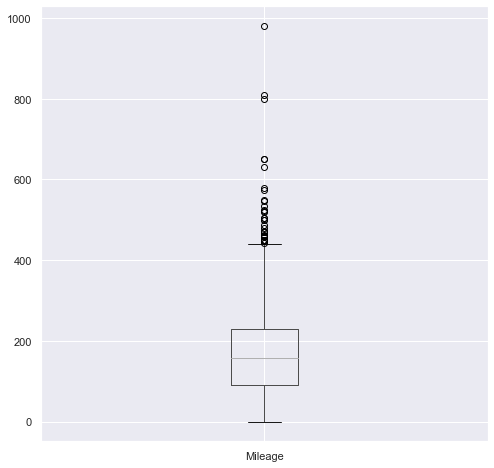

In [11]:
data_nmv.boxplot(column="Mileage",return_type='axes',figsize=(8,8))

<AxesSubplot:>

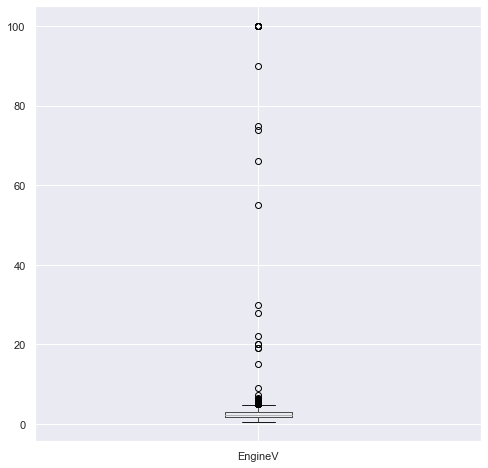

In [12]:
data_nmv.boxplot(column="EngineV",return_type='axes',figsize=(8,8))

<AxesSubplot:>

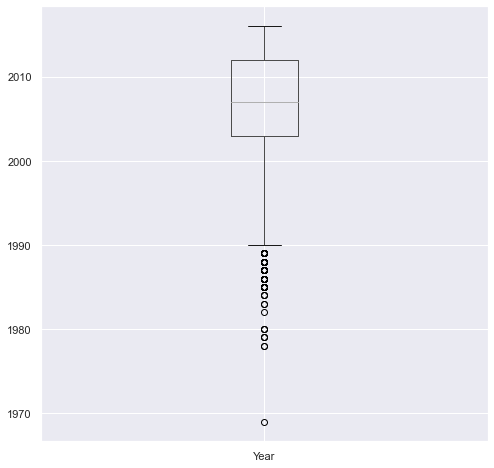

In [13]:
data_nmv.boxplot(column="Year",return_type='axes',figsize=(8,8))

C:\Users\Patience\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


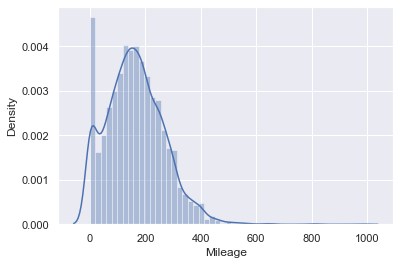

In [14]:
sns.distplot(data_nmv['Mileage'])
plt.show()

C:\Users\Patience\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

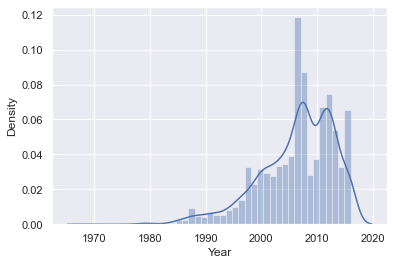

In [15]:
sns.distplot(data_nmv['Year'])

C:\Users\Patience\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

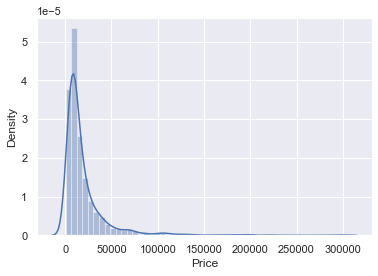

In [16]:
sns.distplot(data_nmv['Price'])

C:\Users\Patience\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

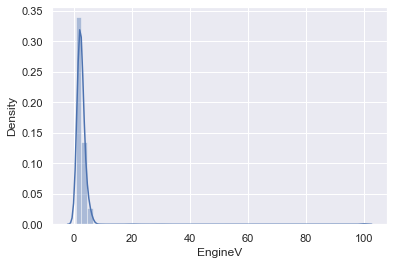

In [17]:
sns.distplot(data_nmv['EngineV'])

In [18]:
q=data_nmv['Price'].quantile(0.99)
q

129812.51999999981

In [19]:
data_nmv1 = data_nmv[data_nmv['Price']<q]

In [20]:
q=data_nmv1['Mileage'].quantile(0.99)
q

435.5100000000002

In [21]:
data_nmv2 = data_nmv1[data_nmv1['Mileage']<q]

In [22]:
q=data_nmv2['Year'].quantile(0.01)
q

1987.0

In [25]:
data_nmv3 = data_nmv2[data_nmv2['Year']>q]

In [27]:
data_nmv3["EngineV"].max()

99.99

In [28]:
data_cleaned = data_nmv3[data_nmv3['EngineV']<6.5] 
data_cleaned.shape

(3867, 8)

In [29]:
data_cleaned = data_cleaned.reset_index(drop=True)

# Assumptions checking for regresssion

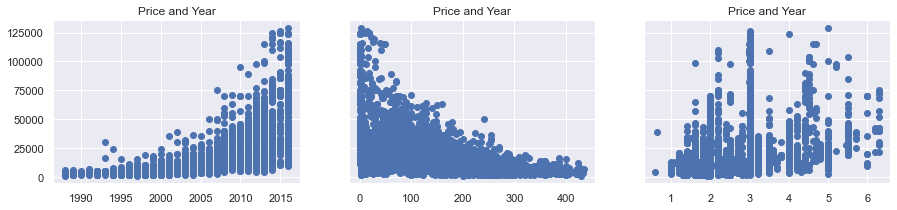

In [40]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax2.set_title('Price and Year')
ax3.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax3.set_title('Price and Year')

plt.show()

In [32]:
data_cleaned['Log_Price'] = np.log(data_cleaned['Price'])

In [33]:
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


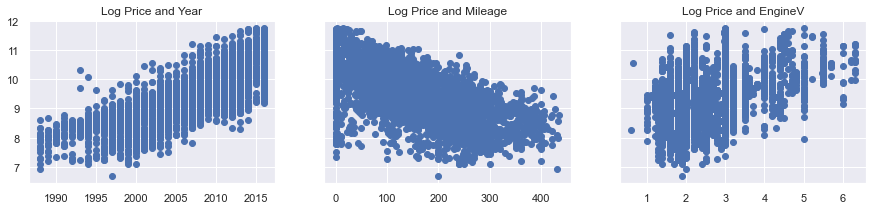

In [41]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Log_Price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['Mileage'], data_cleaned['Log_Price'])
ax2.set_title('Log Price and Mileage')
ax3.scatter(data_cleaned['EngineV'], data_cleaned['Log_Price'])
ax3.set_title('Log Price and EngineV')

plt.show()

# Multicollinearity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [45]:
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns.values

In [46]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [47]:
data_p = data_cleaned.drop(['Year'], axis = 1)
data_p

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,8.779557


# Dummies

In [48]:
data_with_dummies = pd.get_dummies(data_p, drop_first = True)
data_with_dummies

,Price,Mileage,EngineV,Log_Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,11500.0,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,17900.0,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,125000.0,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,6500.0,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [49]:
data_with_dummies.columns.values

array(['Price', 'Mileage', 'EngineV', 'Log_Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [50]:
col_order = ['Log_Price', 'Price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [51]:
data_final = data_with_dummies[col_order]
data_final

,Log_Price,Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,4200.0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,7900.0,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,13300.0,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,23000.0,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,18300.0,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,11500.0,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,17900.0,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,125000.0,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,6500.0,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [52]:
data_f = data_final.drop(['Price'], axis =1)
data_f

,Log_Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# Feature Scaling

In [55]:
target = data_f['Log_Price']
inputs = data_f.drop(['Log_Price'],axis = 1)
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [53]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [58]:
inputs_scaled =scaler.transform(inputs)

# Splitting Data

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state= 365)

# regression

In [64]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [65]:
reg.fit(x_train,y_train)

LinearRegression()

In [68]:
reg.score(x_train,y_train)

0.744996578792662

In [69]:
reg.intercept_

9.304582140750977

In [70]:
yhat_train = reg. predict(x_train)

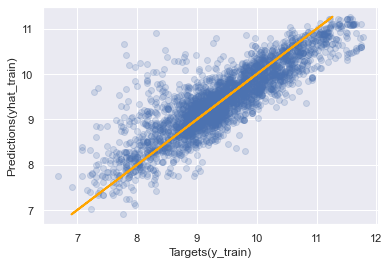

In [74]:
plt.scatter(y_train, yhat_train, alpha = 0.2)
fig = plt.plot(yhat_train,yhat_train, c= 'orange', lw = 2)
plt.xlabel('Targets(y_train)', fontsize = 12)
plt.ylabel('Predictions(yhat_train)', fontsize = 12)
plt.show()

C:\Users\Patience\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Log_Price', ylabel='Density'>

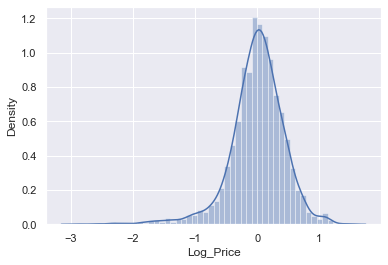

In [75]:
sns.distplot(y_train - yhat_train)

# weigths and bias

In [77]:
bias = reg.intercept_
bias

9.304582140750977

In [79]:
reg_summary = pd.DataFrame(data = inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.004693
1,EngineV,0.220212
2,Brand_BMW,0.038736
3,Brand_Mercedes-Benz,0.032498
4,Brand_Mitsubishi,-0.523814
5,Brand_Renault,-0.571113
6,Brand_Toyota,-0.180768
7,Brand_Volkswagen,-0.217331
8,Body_hatch,-0.588289
9,Body_other,-0.344867


# Testing

In [80]:
yhat_test = reg.predict(x_test)

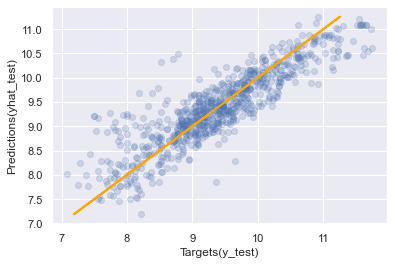

In [81]:
plt.scatter(y_test, yhat_test, alpha = 0.2)
fig = plt.plot(yhat_test,yhat_test, c= 'orange', lw = 2)
plt.xlabel('Targets(y_test)', fontsize = 12)
plt.ylabel('Predictions(yhat_test)', fontsize = 12)
plt.show()

In [83]:
df_pf = pd.DataFrame(data= np.exp(yhat_test), columns=['Predictions'])
df_pf

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075
...,...
769,29651.726363
770,10732.071179
771,13922.446953
772,27487.751303


In [86]:
df_pf['Target']= np.exp(y_test).reset_index(drop = True)

In [88]:
df_pf.head(10)

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
5,21289.799394,20000.0
6,20159.189144,38888.0
7,20349.617702,16999.0
8,11581.537864,12500.0
9,33614.617349,41000.0


In [89]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predictions']

In [90]:
df_pf['PercentChange']= np.absolute(100*df_pf['Residual']/df_pf['Target'])

In [91]:
df_pf

,Predictions,Target,Residual,PercentChange
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [93]:
df_pf.describe()

,Predictions,Target,Residual,PercentChange
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [97]:
pd.options.display.max_rows = 900
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by =['PercentChange'])

,Predictions,Target,Residual,PercentChange
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
